# Tweaking the model
* Get mor data
* more layers/hidden units
* train longer

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make a bigger dataset
X =  tf.range(-100, 100, 4)
# Make lables
y = X + 10
# split the data in train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [3]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'), 
    tf.keras.layers.Dense(1, name = 'output_layer') 
], name='model_001')

model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [4]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [5]:
y_pred = model.predict(X_test)

In [6]:
def plot_prediction(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predictions = y_pred):
    '''plots training data, test data and compares to ground truth; calculates and returns mae and mse
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b',marker ='.', label='training data')
    plt.scatter(test_data, test_labels, c='g', marker='x' ,label ='testing data')
    plt.scatter(test_data, predictions, c='r', marker ='o', label = 'predicted data')
    plt.legend()
    mae = tf.metrics.mean_absolute_error(test_labels, tf.squeeze(tf.constant(predictions))).numpy()
    mse = tf.metrics.mean_squared_error(test_labels, tf.squeeze(tf.constant(predictions))).numpy()
    print('MAE: ' + str(mae))
    print('MSE: ' + str(mse))
    return mae, mse

MAE: 3.19694
MSE: 13.070127


(3.19694, 13.070127)

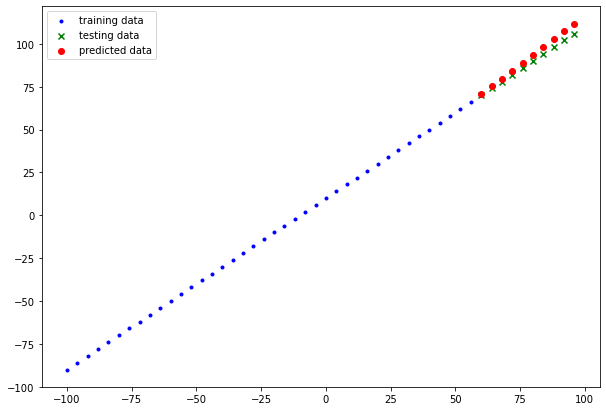

In [7]:
plot_prediction()

1. model_1 - the same as the original model, 1 layer, trained for 100 epochs
2. model_2 - 2 layers, 100 epochs
3. model_3 - 2 layers, 500 epochs

In [8]:
tf.random.set_seed(42)

#Create Model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit
model_1.fit(X_train, y_train, epochs= 100, verbose=0)

MAE: 18.745327
MSE: 353.57336


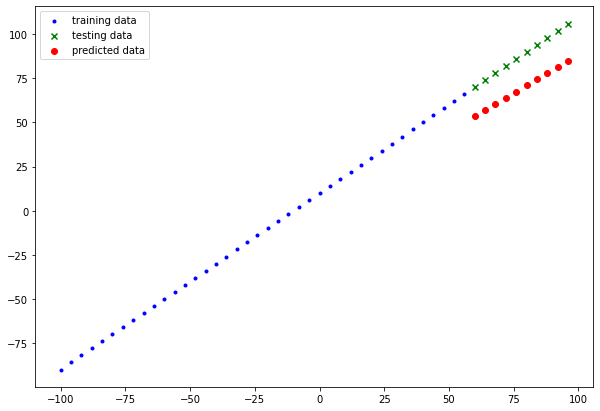

In [9]:
y_pred_1 = model_1.predict(X_test)
mae_1, mse_1 = plot_prediction(predictions=y_pred_1)

In [10]:
tf.random.set_seed(42)

#Create Model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit
model_2.fit(X_train, y_train, epochs= 100, verbose=0)

MAE: 3.19694
MSE: 13.070127


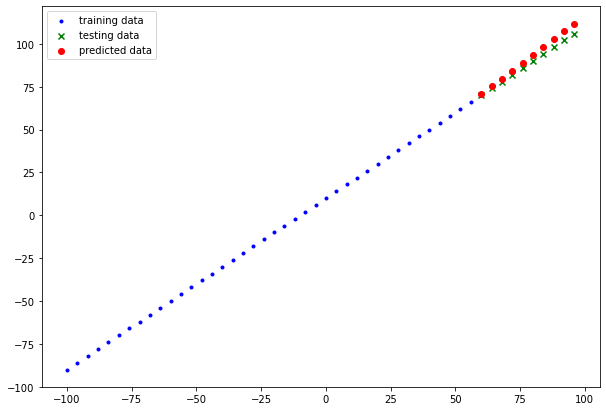

In [11]:
y_pred_2 = model_2.predict(X_test)
mae_2, mse_2 = plot_prediction(predictions=y_pred_2)

In [15]:
tf.random.set_seed(42)

#Create Model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit
model_3.fit(X_train, y_train, epochs= 500, verbose=0)

MAE: 68.713615
MSE: 4808.0273


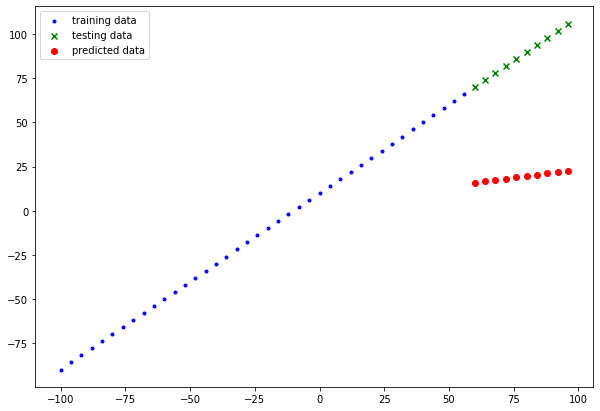

In [17]:
y_pred_3 = model_3.predict(X_test)
mae_3, mse_3 = plot_prediction(predictions=y_pred_3)

Model 3 is overtrained/overfitted!

### Comparing the results

In [18]:
import pandas as pd

In [21]:
models_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

all_results =pd.DataFrame(models_results, columns=['model', 'MAE', 'MSE'])
all_results

,model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

Tools to help doing so
* TensorBoard - component of TF library
* Weights & Biase -a tool for tracking all kinds of ml experiments (plugs into Tensor Board)

## Saving our models

allows us to use it in a web apllication or an app

In [32]:
pwd

'C:\\Users\\neema\\Notebooks\\Udemy_TensorFlow'

In [37]:
# h5 is specifies the HDF5 format, which is usuable outside TF. 
# the default format is the SaveModel_format (no suffix required)


path = 'C:\\Users\\neema\\Notebooks\\Udemy_TensorFlow'
path = path +  '\model_2.h5'
model_2.save(path)

### Loading a model

In [39]:
loaded_model = tf.keras.models.load_model('model_2')

In [40]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
loaded_model_HDF5 = tf.keras.models.load_model('model_2.h5')
loaded_model_HDF5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [44]:
loaded_predictions = loaded_model_HDF5.predict(X_test)
(y_pred_2 == loaded_predictions).squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

MAE: 3.19694
MSE: 13.070127


(3.19694, 13.070127)

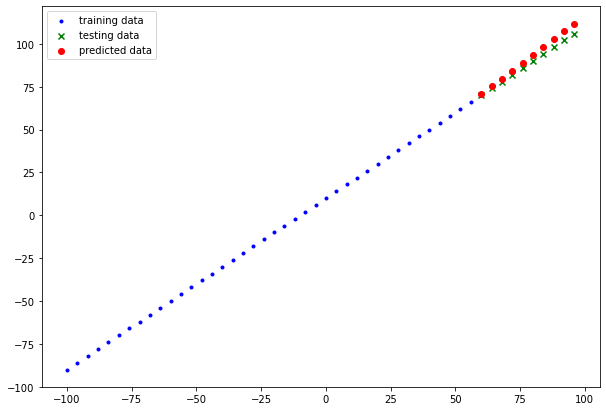

In [45]:
plot_prediction(predictions=loaded_predictions)